# Métodos de bisección y Newton

### Ejercicio 4. 
### Localiza y separa las raíces de la ecuación

### $$x^2=-10\cos(x)$$

### Calcula aproximadamente las soluciones mediante el método de bisección, con error absoluto menor que $10^{-4}$.

SOLUCIÓN

### Paso 1. Localizar y separar las raíces.

Vamos a representar la función $f(x)=x^2+10\cos(x)$ para ver si localizamos  las raices de la ecuación $$x^2+10\cos(x)=0$$

Observad que son los $x$  donde su gráfica corta al eje $OX$. Definimos la función:

In [1]:
f(x)=x^2+10*cos(x)
f

x |--> x^2 + 10*cos(x)

Como $-10 \cos (x)$  toma valores entre -10 y 10, las raíces estarán en $[-\sqrt{10}, \sqrt{10}]$. Como $\sqrt{10} $ es menor que 4, hagamos la gráfica $y=f(x)$ en el intervalo $[-4,4]$:

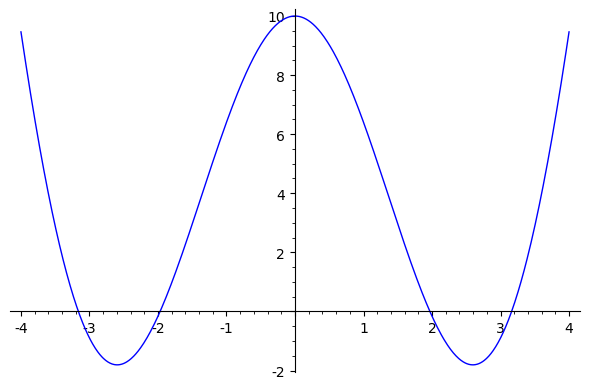

In [2]:
plot(f(x),(x,-4,4))

Por una lado, observamos que la gráfica es simétrica respecto al eje Y. Esto se debe a que $f(x)=x^2+10\cos(x)=(-x)^2+10\cos(-x)=f(-x)$. Entonces, si $x$ es raíz, $-x$ también.
Por otro lado, observamos que la ecuación $f(x)=0$ tiene cuatro raíces.

Hay una raíz en cada uno de los intervalos siguientes: $[-4,-3]$, $[-2.5,-1.5]$ , $[1.5,2.5]$ y $[3,4]$. Por simetría, las raíces en $[-4,-3]$ y $[3,4]$ son iguales en valor absoluto y las raíces en $[-2.5,-1.5]$ y $[1.5,2.5]$ son iguales en valor absoluto.

### Paso 2. Método de bisección

Vamos a calcular aproximadamente, mediante el método de bisección y con error menor que $10^{-5}$, las soluciones que hay en los intervalos $[1.5,2.5]$ y $[3, 4]$ .

El número $N$ de pasos del método de bisección que tenemos que dar para alcanzar la precisión deseada debe cumplir
$\displaystyle N>\dfrac{\log\left(\frac{b-a}{\varepsilon}\right)}{\log 2}-1$
</span></p>
Empecemos con el intervalo $[1.5,2.5]$: $a=1.5$, $b=2.5$ y $\varepsilon=10^{-5}$. Calculamos el número de pasos:

In [3]:
a=1.5
b=2.5
epsilon=10^(-5)
numerical_approx(log((b-a)/epsilon)/log(2)-1)

15.6096404744368

<p>Luego serán necesarios, como mucho, $N=16$ pasos.</p>
<p>Vamos a realizar algunos de los primeros "a mano".</p>
Paso 0.</span> Definimos $a_0=a$, $b_0=b$, $c_0=\dfrac{a_0+b_0}{2}$:

In [4]:
a0=a
b0=b
c0=(a0+b0)/2
c0

2.00000000000000

<p>y evaluamos la función en $a_0$, $c_0$ y $b_0$ para ver dónde se produce el cambio de signo:</p>

In [5]:
 f(a0) ,  f(c0) , f(b0) 

(2.95737201667703, -0.161468365471424, -1.76143615546934)

<p>Como $f(a_0)$ y $f(c_0)$ tienen signos opuestos, definimos $a_1=a_0$, $b_1=c_0$ y vamos al siguiente paso.</p>

In [6]:
a1=a0;b1=c0

Paso 1. Definimos $c_1=\dfrac{a_1+b_1}{2}$:

In [7]:
c1=(a1+b1)/2;  c1

1.75000000000000

y evaluamos la función en $a_1$, $c_1$ y $b_1$ para ver dónde se produce el cambio de signo:

In [8]:
f(a1),f(c1),f(b1)

(2.95737201667703, 1.28003944350508, -0.161468365471424)

Como $f(b_1)$ y $f(c_1)$ tienen signos opuestos, definimos $a_2=c_1$, $b_2=b_1$ y vamos al siguiente paso.

In [9]:
a2=c1;b2=b1

Paso 2. Definimos $c_2=\dfrac{a_2+b_2}{2}$:

In [10]:
c2=(a2+b2)/2;  c2

1.87500000000000

y evaluamos la función en $a_2$, $c_2$ y $b_2$ para ver dónde se produce el cambio de signo:

In [11]:
f(a2) ,f(c2) ,f(b2)

(1.28003944350508, 0.520289938104259, -0.161468365471424)

Como $f(c_2)$ y $f(b_2)$ tienen signos opuestos, definimos $a_3=c_2$, $b_3=b_2$ y vamos al siguiente paso.

In [12]:
a3=c2;b3=b2

<p>etc. etc.</p>
<p>Continuaríamos el proceso hasta calcular $c_{16}$ como mucho.</p>
<p>Podemos automatizar la tarea del modo siguiente:</p>

In [13]:
a,b

(1.50000000000000, 2.50000000000000)

In [14]:
contador=0
a0=a
b0=b
c0=(b0+a0)/2
while abs(f(c0))>0 and contador<16:
    if f(a0)*f(c0)<0:
        b0=c0
        c0=(b0+a0)/2  
    else:
        a0=c0
        c0=(b0+a0)/2
    contador=contador+1
print(contador)

16


Al haber llegado a la iteración 16, facilmente no hayamos llegado a la solución exacta. Comprobamos:

In [15]:
show(c0)
show(find_root(f(x),a,b))
show(c0-find_root(f(x),a,b))
abs(c0-find_root(f(x),a,b)) < epsilon

1.96887969970703

1.9688729378198275

6.76188720372117e-6

True

Por tanto, $c_{16}=1.96887969970703$ es una aproximación de la raíz positiva de la ecuación $x^2+10\cos x=0$ con error absoluto menor que $10^{-5}$.
En este caso, por tratarse de una función par,  otra raíz sería  $-1.96887969970703$.

Ahora aproximamos la raíz en $[3,4]$. El número $N$ de pasos es igual porque $b-a=1$ en los intevalos considerados:

In [16]:
a=3
b=4
epsilon=10^(-5)
numerical_approx(log((b-a)/epsilon)/log(2)-1)

15.6096404744368

In [17]:
contador=0
a0=a
b0=b
c0=(b0+a0)/2
while abs(f(c0))>0 and contador<16:
    if f(a0)*f(c0)<0:
        b0=c0
        c0=(b0+a0)/2  
    else:
        a0=c0
        c0=(b0+a0)/2
    contador=contador+1
print(contador)

16


<p>Al haber llegado a la iteración 16, fácilmente no hayamos llegado a la solución dada por SAGE. Comprobamos.</p>

In [18]:
show(numerical_approx(c0))
show(find_root(f(x),a,b))
show(c0-find_root(f(x),a,b))
c0-find_root(f(x),a,b) < epsilon

3.16194915771484

3.161950024710255

-8.669954114637335e-07

True

<p>Entonces la solución aproximada hallada es  3.16194915771484. La otra sería -3.16194915771484</p>